<a href="https://colab.research.google.com/github/RaksoIngenieria/Data-Analytics/blob/main/AromasDelValle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análisis Exploratorio de Datos (EDA) - Analítica de la Cadena de Suministros
1. Importar librerias

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output


In [4]:
# Cargar Dataset
df = pd.read_csv('/content/EndInvFINAL12312016.csv')

# La funcion head() devuelve por default las primeras 5 filas, a menos que dentro del parentesis se indique lo contrario
df.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31


In [5]:
# La funcion tail() devuelve por default las ultimas 5 filas, a menos que dentro del parentesis se indique lo contrario
df.tail()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
224484,81_PEMBROKE_90087,81,PEMBROKE,90087,Ch Mouton Rothschild 12 Paui,750mL,3,469.99,2016-12-31
224485,81_PEMBROKE_90088,81,PEMBROKE,90088,Ch Le Petite Mouton 12 Pauil,750mL,3,134.99,2016-12-31
224486,81_PEMBROKE_90089,81,PEMBROKE,90089,Ch Lynch Bages 12 Pauillac,750mL,3,119.99,2016-12-31
224487,81_PEMBROKE_90090,81,PEMBROKE,90090,Ch Lafite Rothschild 12,750mL,3,649.99,2016-12-31
224488,81_PEMBROKE_90604,81,PEMBROKE,90604,Ch Lynch Bages Pauilac,750mL,2,119.99,2016-12-31


In [6]:
# El atributo Devuelve una tupla que representa las dimensiones de un DataFrame, indicando el número de filas y columnas
df.shape

(224489, 9)

In [7]:
# La funcion info() proporciona un resumen del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224489 entries, 0 to 224488
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  224489 non-null  object 
 1   Store        224489 non-null  int64  
 2   City         223205 non-null  object 
 3   Brand        224489 non-null  int64  
 4   Description  224489 non-null  object 
 5   Size         224489 non-null  object 
 6   onHand       224489 non-null  int64  
 7   Price        224489 non-null  float64
 8   endDate      224489 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 15.4+ MB


In [8]:
# El atributo retorna las etiquetas de las columnas del DataFrame
df.columns

Index(['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size',
       'onHand', 'Price', 'endDate'],
      dtype='object')

In [9]:
# La expresión df.isnull().sum() se utiliza para contar la cantidad de valores faltantes (nulos o NaN) en cada columna de un DataFrame.
df.isnull().sum()

,0
InventoryId,0
Store,0
City,1284
Brand,0
Description,0
Size,0
onHand,0
Price,0
endDate,0


2. Analítica descriptiva.


In [10]:
# Generate descriptive statistics.
# El método df.describe() proporciona un resumen estadístico de las columnas numéricas de un DataFrame.
df.describe()

,Store,Brand,onHand,Price
count,224489.000000,224489.000000,224489.000000,224489.000000
mean,43.505740,14356.370513,21.763988,23.585583
std,23.326415,13118.467851,37.233576,79.202775
min,1.000000,58.000000,0.000000,0.490000
25%,23.000000,3798.000000,7.000000,9.990000
50%,44.000000,8259.000000,12.000000,14.990000
75%,66.000000,23965.000000,22.000000,23.490000
max,81.000000,90631.000000,3676.000000,13999.900000


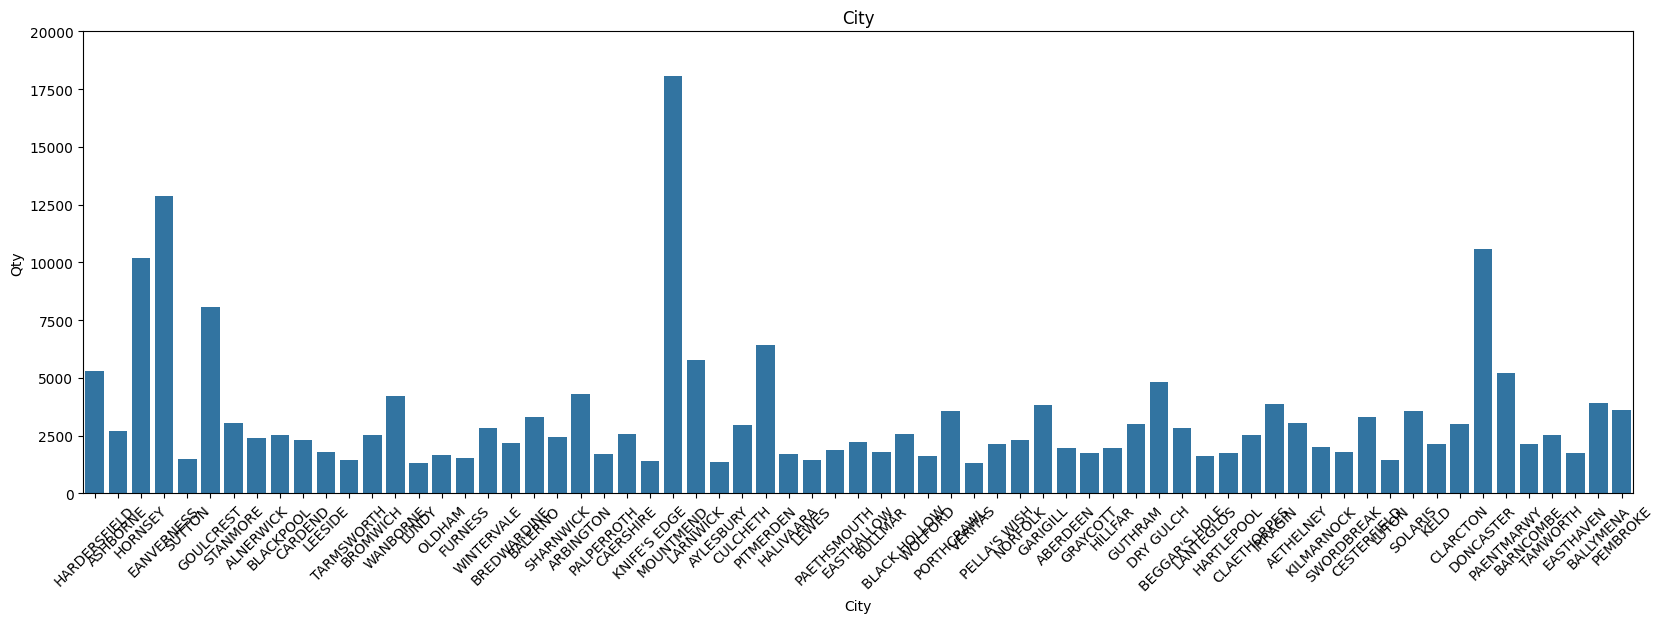

In [11]:
# Diagrama de barras

# countplot es una función de la biblioteca Seaborn en Python
# Crea un gráfico de barras donde la altura de cada barra,
# representa el número de ocurrencias de una categoría específica en el conjunto de datos.

plt.figure(figsize=(20,6))
sns.countplot(data=df, x='City')
plt.xlabel('City')
plt.ylabel('Qty')
plt.ylim(0, 20000)  # Establecer el rango del eje y:
plt.xticks(rotation=45) # Rotar las etiquetas 45 grados
plt.title('City')
plt.show()

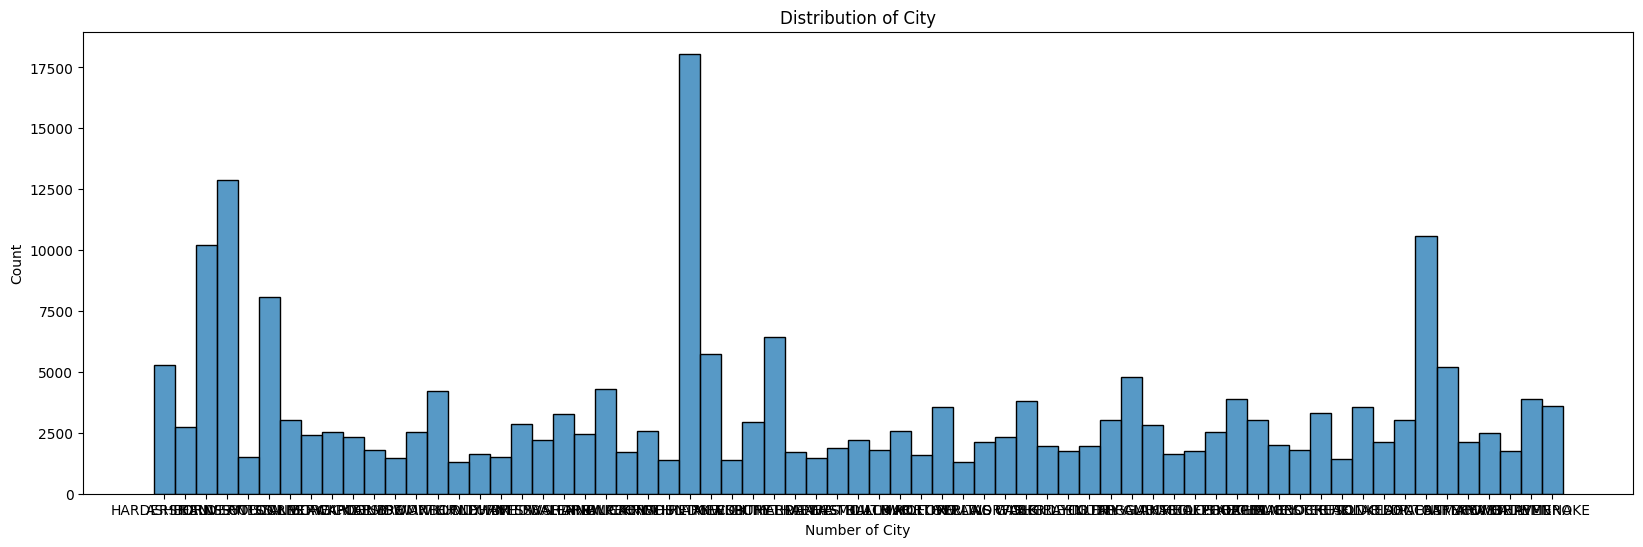

In [ ]:
# Histograma
plt.figure(figsize=(20,6))
sns.histplot(data=df, x='City', bins=20)
plt.xlabel('Number of City')
plt.ylabel('Count')
plt.title('Distribution of City')
plt.show()

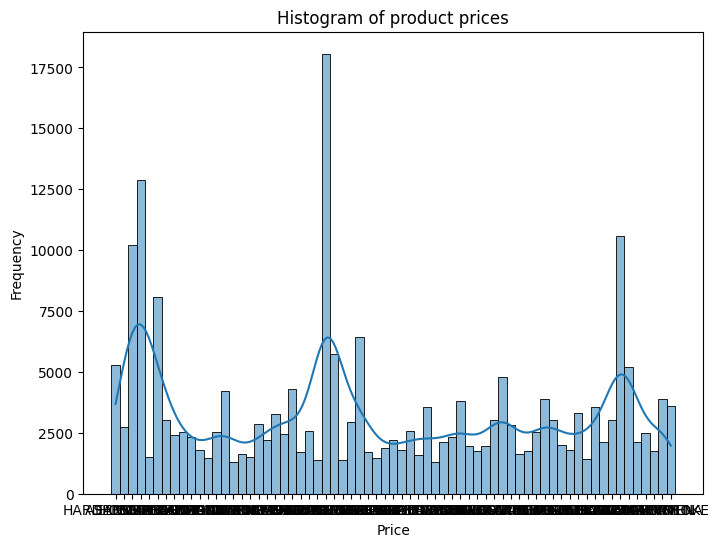

In [ ]:
#Deseamos un histograma de la distribución de los precios de los productos
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='City', kde=True, bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of product prices')
plt.show()

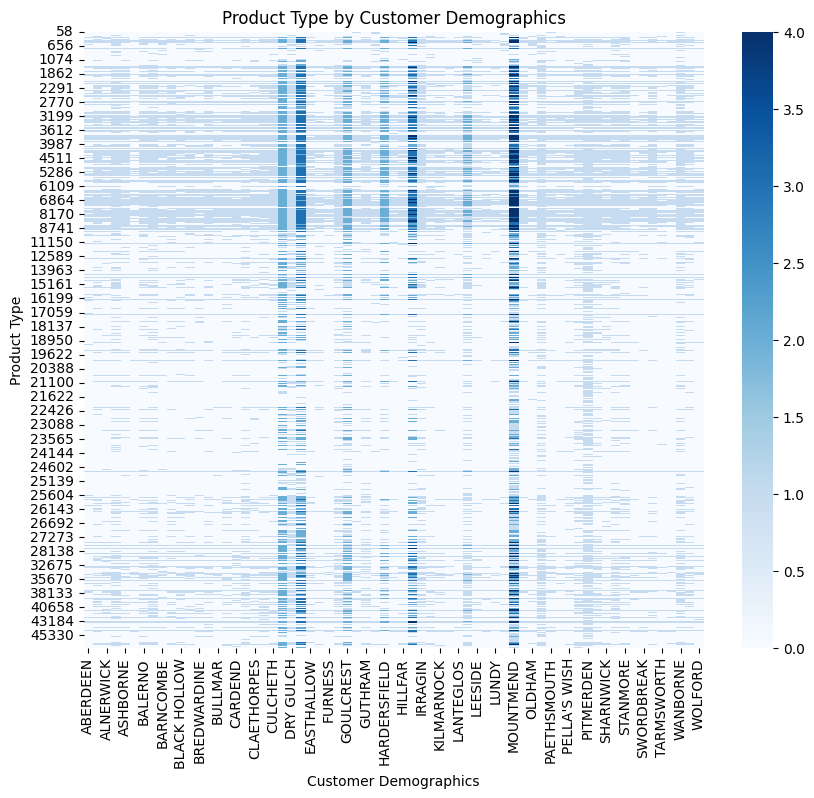

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(pd.crosstab(df['Brand'], df['City']), cmap='Blues')
plt.xlabel('Customer Demographics')
plt.ylabel('Product Type')
plt.title('Product Type by Customer Demographics')
plt.show()

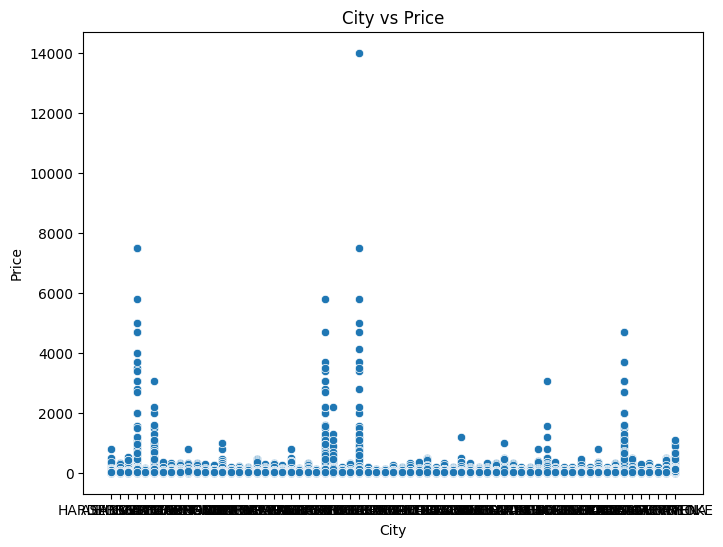

In [ ]:
#diagrama de dispersión
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='City', y='Price')
plt.xlabel('City')
plt.ylabel('Price')
plt.title('City vs Price')
plt.show()

/tmp/ipython-input-2172325585.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_suppliers.values, y=top_suppliers.index, palette='Blues_d')


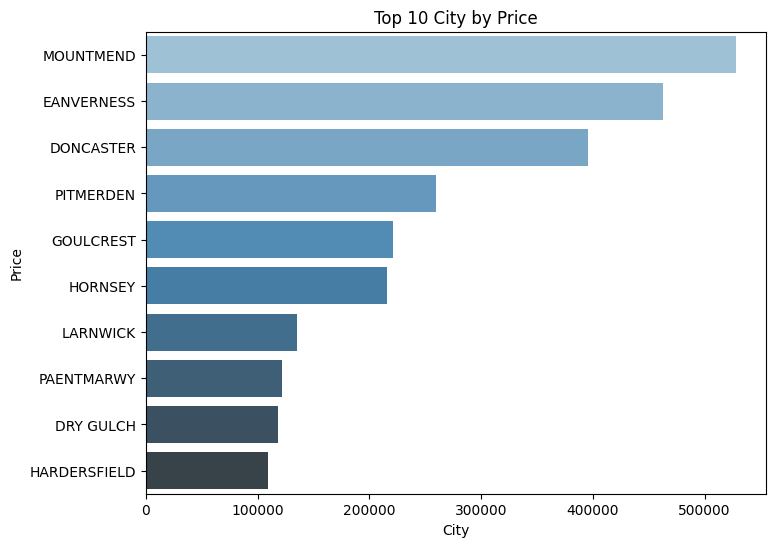

In [ ]:
plt.figure(figsize=(8,6))
top_suppliers = df.groupby('City')['Price'].sum().nlargest(10)
sns.barplot(x=top_suppliers.values, y=top_suppliers.index, palette='Blues_d')
plt.xlabel('City')
plt.ylabel('Price')
plt.title('Top 10 City by Price')
plt.show()

In [ ]:
inventario_tiendas = df.groupby('City')['onHand'].sum()
inventario_tiendas_df = inventario_tiendas.to_frame(name='onHand')
inventario_tiendas_df


,onHand
City,
ABERDEEN,43148
AETHELNEY,70911
ALNERWICK,40390
ARBINGTON,83275
ASHBORNE,56671
...,...
TARMSWORTH,27382
VERITAS,22083
WANBORNE,95827


/tmp/ipython-input-260195939.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_suppliers.values, y=top_suppliers.index, palette='Blues_d')


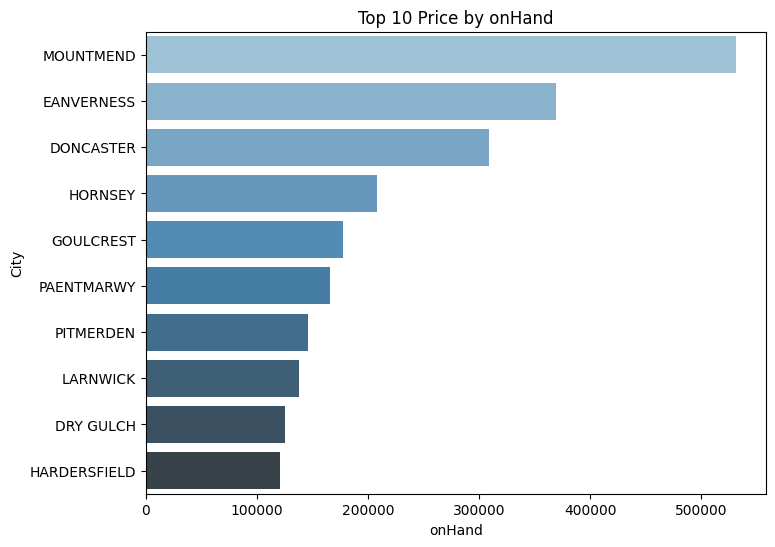

In [ ]:
plt.figure(figsize=(8,6))
top_suppliers = df.groupby('City')['onHand'].sum().nlargest(10)
sns.barplot(x=top_suppliers.values, y=top_suppliers.index, palette='Blues_d')
plt.xlabel('City')
plt.ylabel('onHand')
plt.title('Top 10 City by onHand')
plt.show()

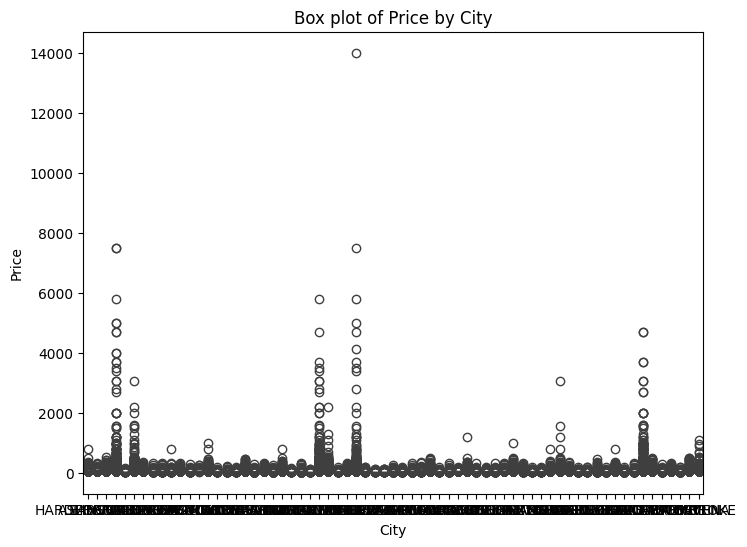

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='City', y='Price')
plt.xlabel('City')
plt.ylabel('Price')
plt.title('Box plot of Price by City')
plt.show()

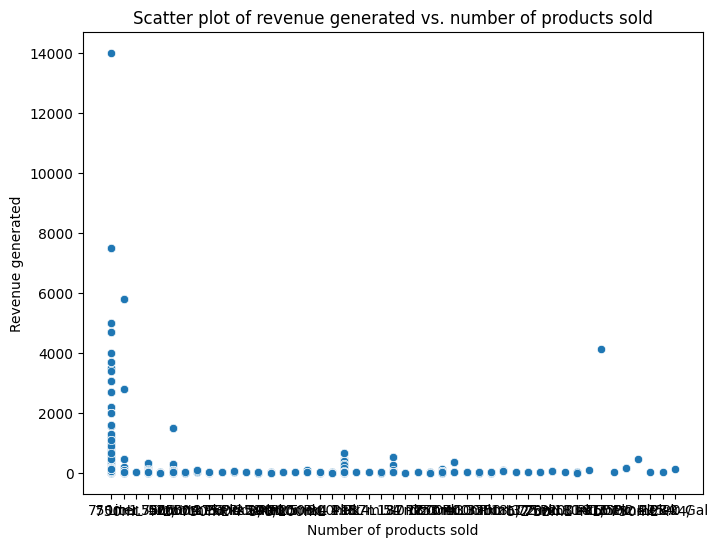

In [ ]:
# ¿Qué relación hay entre el Número de productos vendidos y los ingresos generados?
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Size', y='Price')
plt.xlabel('Number of products sold')
plt.ylabel('Revenue generated')
plt.title('Scatter plot of revenue generated vs. number of products sold')
plt.show()

In [ ]:
city_revenue = df.groupby('Description')['onHand'].sum()
city_revenue = city_revenue.sort_values(ascending=False)
city_revenue

,onHand
Description,
Capt Morgan Spiced Rum,34499
Jack Daniels No 7 Black,33385
Absolut 80 Proof,33289
Bacardi Superior Rum,29120
Baileys Irish Cream,28763
...,...
Luca Bosio Moscato d'Asti,0
Quattro Mani Montepulciano,0
A to Z Rsl,0


/tmp/ipython-input-822529683.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_revenue[:10], y=city_revenue[:10].index, palette='Blues_r')


Text(0.5, 1.0, 'Top 10 City by Revenue')

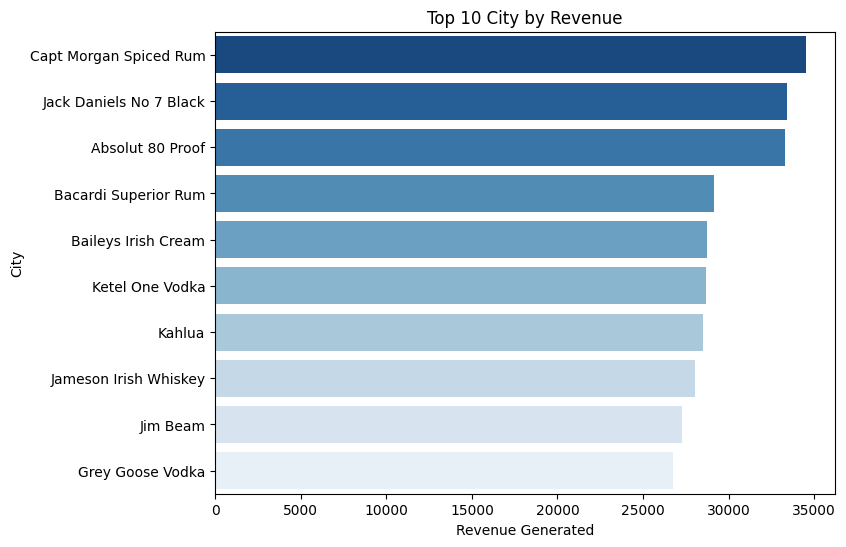

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=city_revenue[:10], y=city_revenue[:10].index, palette='Blues_r')
plt.xlabel('Revenue Generated')
plt.ylabel('Description')
plt.title('Top 10 Description by Revenue')

📊 KPI PRINCIPALES
- Total de productos únicos: 8732
- Total de marcas únicas: 9653
- Valor total del inventario: $79,704,851.13
- Precio promedio de productos: $23.59


/tmp/ipython-input-4005896972.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price', y='Description', data=df_top10_price, palette="viridis")


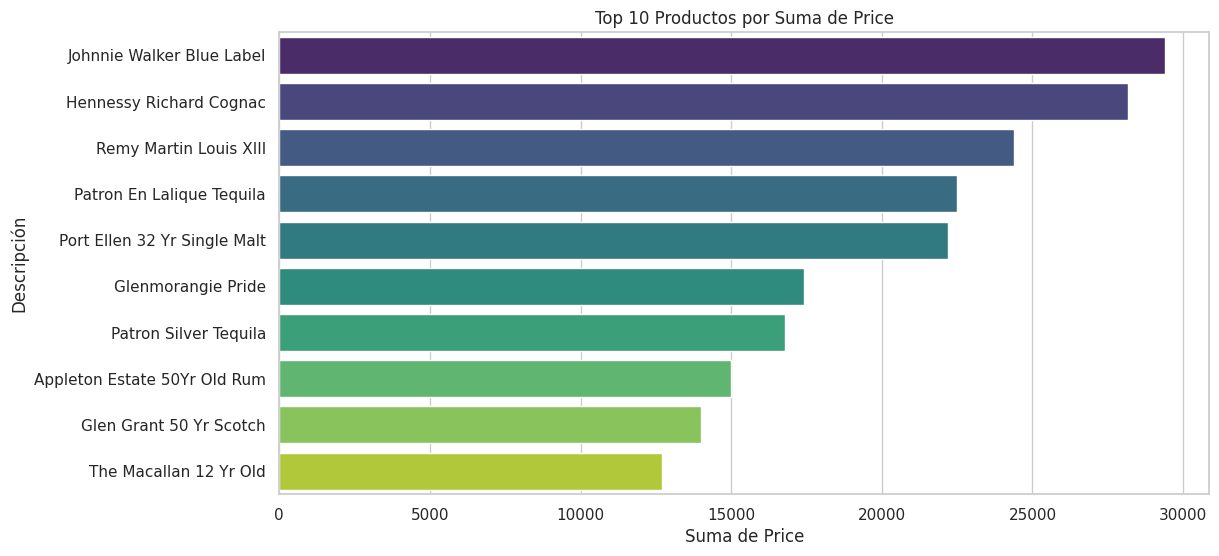

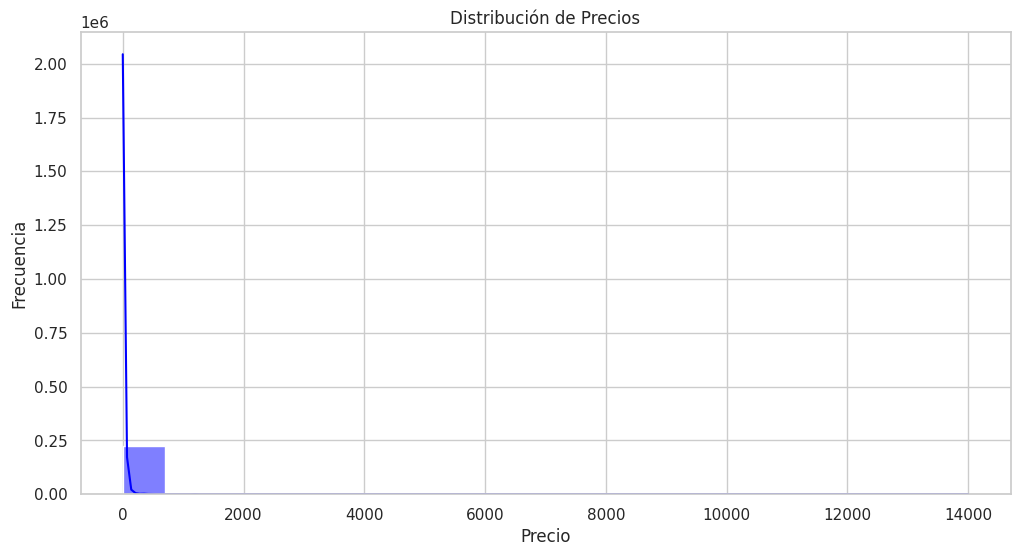

/tmp/ipython-input-4005896972.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='InventoryValue', y='City', data=df_city_value.sort_values('InventoryValue', ascending=False), palette="magma")


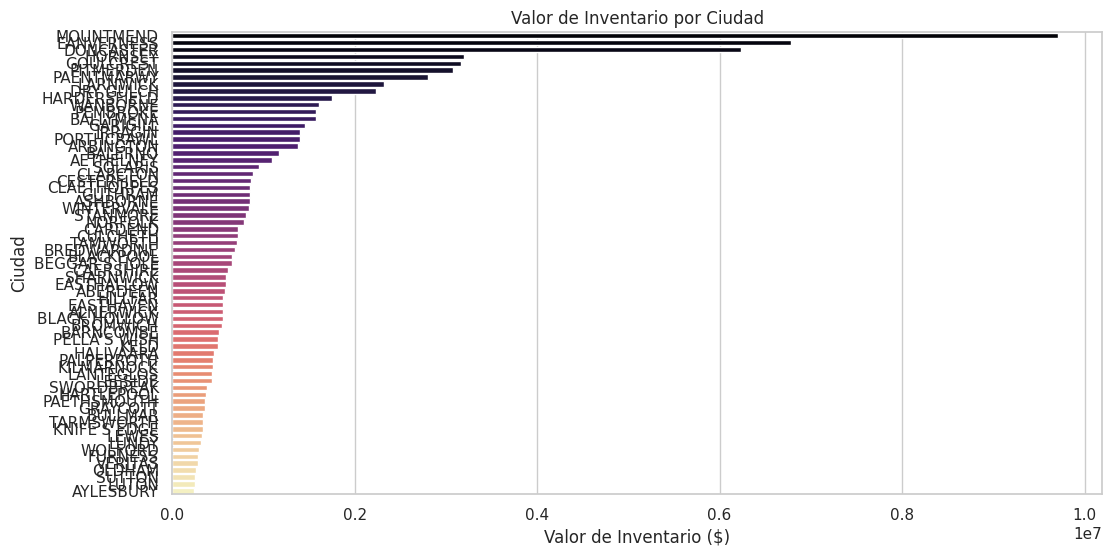

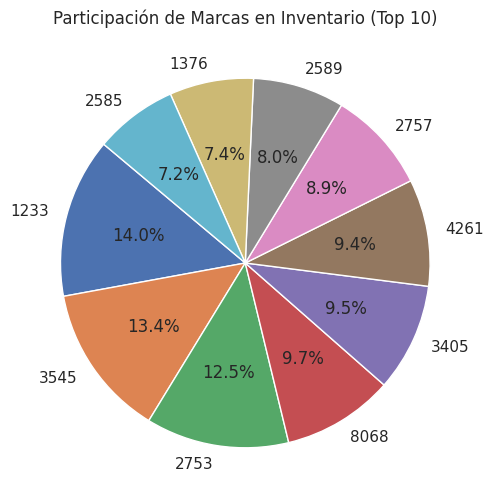

/tmp/ipython-input-4005896972.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='onHand', y='Description', data=df_top_stock, palette="coolwarm")


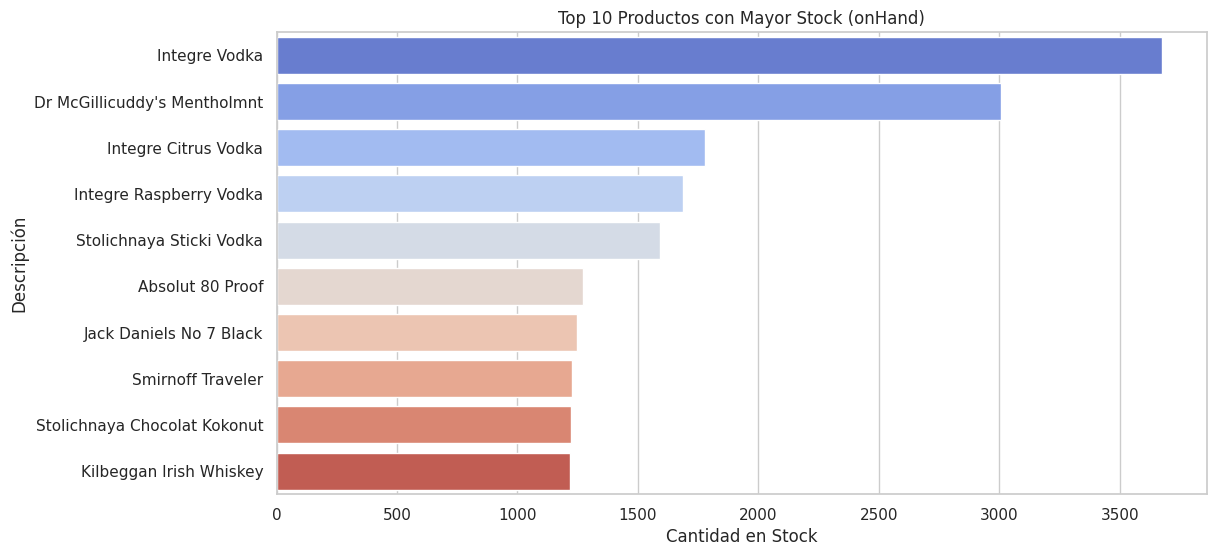

/tmp/ipython-input-4005896972.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='InventoryValue', y='Description', data=df_top_value, palette="crest")


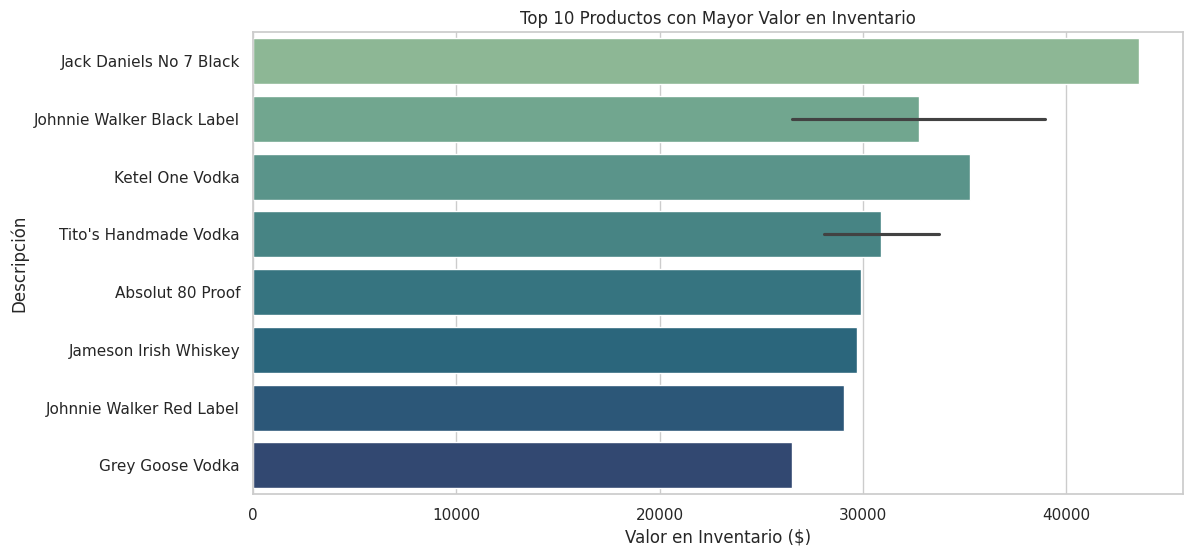

In [ ]:
# Configuración visual
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Crear columna de valor total del inventario
df['InventoryValue'] = df['Price'] * df['onHand']

# ==========================
# 1️⃣ KPI PRINCIPALES
# ==========================
print("📊 KPI PRINCIPALES")
print(f"- Total de productos únicos: {df['Description'].nunique()}")
print(f"- Total de marcas únicas: {df['Brand'].nunique()}")
print(f"- Valor total del inventario: ${df['InventoryValue'].sum():,.2f}")
print(f"- Precio promedio de productos: ${df['Price'].mean():.2f}")

# ==========================
# 2️⃣ TOP 10 POR SUMA DE PRICE
# ==========================
df_sum_price = df.groupby('Description', as_index=False)['Price'].sum()
df_top10_price = df_sum_price.sort_values(by='Price', ascending=False).head(10)

plt.figure()
sns.barplot(x='Price', y='Description', data=df_top10_price, palette="viridis")
plt.title("Top 10 Productos por Suma de Price")
plt.xlabel("Suma de Price")
plt.ylabel("Descripción")
plt.show()

# ==========================
# 3️⃣ DISTRIBUCIÓN DE PRECIOS
# ==========================
plt.figure()
sns.histplot(df['Price'], bins=20, kde=True, color="blue")
plt.title("Distribución de Precios")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

# ==========================
# 4️⃣ VALOR DE INVENTARIO POR CIUDAD
# ==========================
df_city_value = df.groupby('City', as_index=False)['InventoryValue'].sum()
plt.figure()
sns.barplot(x='InventoryValue', y='City', data=df_city_value.sort_values('InventoryValue', ascending=False), palette="magma")
plt.title("Valor de Inventario por Ciudad")
plt.xlabel("Valor de Inventario ($)")
plt.ylabel("Ciudad")
plt.show()

# ==========================
# 5️⃣ PARTICIPACIÓN DE MARCAS (TOP 10)
# ==========================
df_brand_value = df.groupby('Brand', as_index=False)['InventoryValue'].sum()
df_brand_top10 = df_brand_value.sort_values(by='InventoryValue', ascending=False).head(10)

plt.figure()
plt.pie(df_brand_top10['InventoryValue'], labels=df_brand_top10['Brand'], autopct='%1.1f%%', startangle=140)
plt.title("Participación de Marcas en Inventario (Top 10)")
plt.show()

# ==========================
# 6️⃣ PRODUCTOS CON MAYOR STOCK Y VALOR
# ==========================
df_top_stock = df.sort_values(by='onHand', ascending=False).head(10)
plt.figure()
sns.barplot(x='onHand', y='Description', data=df_top_stock, palette="coolwarm")
plt.title("Top 10 Productos con Mayor Stock (onHand)")
plt.xlabel("Cantidad en Stock")
plt.ylabel("Descripción")
plt.show()

df_top_value = df.sort_values(by='InventoryValue', ascending=False).head(10)
plt.figure()
sns.barplot(x='InventoryValue', y='Description', data=df_top_value, palette="crest")
plt.title("Top 10 Productos con Mayor Valor en Inventario")
plt.xlabel("Valor en Inventario ($)")
plt.ylabel("Descripción")
plt.show()

In [ ]:
# Configuración visual
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Cargar datos
df = pd.read_csv("EndInvFINAL12312016.csv")

# Crear columna de valor total de inventario
df['InventoryValue'] = df['Price'] * df['onHand']

# ==========================
# Función para generar dashboard por ciudad
# ==========================
def dashboard_ciudad(ciudad):
    clear_output(wait=True)

    # Filtrar por ciudad seleccionada
    df_city = df[df['City'] == ciudad]

    # KPIs básicos
    total_inventario = df_city['onHand'].sum()
    valor_inventario = df_city['InventoryValue'].sum()
    precio_promedio = df_city['Price'].mean()
    marcas_unicas = df_city['Brand'].nunique()
    productos_unicos = df_city['Description'].nunique()

    print(f"📍 Dashboard - Ciudad: {ciudad}")
    print(f"- Total inventario (onHand): {total_inventario:,}")
    print(f"- Valor total inventario: ${valor_inventario:,.2f}")
    print(f"- Precio promedio: ${precio_promedio:,.2f}")
    print(f"- Marcas únicas: {marcas_unicas}")
    print(f"- Productos únicos: {productos_unicos}")

    # ---- Top 10 productos por inventario ----
    df_top_prod = df_city.groupby('Description', as_index=False)['onHand'].sum().sort_values(by='onHand', ascending=False).head(10)
    plt.figure()
    sns.barplot(x='onHand', y='Description', data=df_top_prod, palette='coolwarm')
    plt.title(f"Top 10 Productos con Mayor Inventario en {ciudad}")
    plt.xlabel("Inventario (onHand)")
    plt.ylabel("Producto")
    plt.show()

    # ---- Top 10 marcas por valor ----
    df_top_brand = df_city.groupby('Brand', as_index=False)['InventoryValue'].sum().sort_values(by='InventoryValue', ascending=False).head(10)
    plt.figure()
    sns.barplot(x='InventoryValue', y='Brand', data=df_top_brand, palette='magma')
    plt.title(f"Top 10 Marcas por Valor en {ciudad}")
    plt.xlabel("Valor de Inventario ($)")
    plt.ylabel("Marca")
    plt.show()

    # ---- Distribución de precios ----
    plt.figure()
    sns.histplot(df_city['Price'], bins=20, kde=True, color='blue')
    plt.title(f"Distribución de Precios en {ciudad}")
    plt.xlabel("Precio")
    plt.ylabel("Frecuencia")
    plt.show()

    # ---- Comparativa con otras ciudades ----
    df_comparativa = df.groupby('City', as_index=False)['InventoryValue'].sum().sort_values(by='InventoryValue', ascending=False)
    plt.figure()
    sns.barplot(x='InventoryValue', y='City', data=df_comparativa, palette='viridis')
    plt.axhline(valor_inventario, color='red', linestyle='--', label=f"{ciudad} (${valor_inventario:,.0f})")
    plt.title("Comparación de Valor de Inventario entre Ciudades")
    plt.xlabel("Valor de Inventario ($)")
    plt.ylabel("Ciudad")
    plt.legend()
    plt.show()

# ==========================
# Widget interactivo
# ==========================
ciudades = sorted(df['City'].dropna().unique())
widget_ciudad = widgets.Dropdown(options=ciudades, description="Ciudad:", style={'description_width':'80px'}, layout=widgets.Layout(width='50%'))
widgets.interact(dashboard_ciudad, ciudad=widget_ciudad)

interactive(children=(Dropdown(description='Ciudad:', layout=Layout(width='50%'), options=('ABERDEEN', 'AETHEL…

<function __main__.dashboard_ciudad(ciudad)>

In [ ]:
# Agrupar por ciudad y sumar inventario
df_city_inventory = df.groupby('City', as_index=False)['onHand'].sum()

# Ordenar de mayor a menor inventario
df_city_inventory_sorted = df_city_inventory.sort_values(by='onHand', ascending=False)

# Mostrar la ciudad con mayor inventario
top_city_inventory = df_city_inventory_sorted.head(1)
print("🏙️ Ciudad con mayor inventario:")
print(top_city_inventory)

🏙️ Ciudad con mayor inventario:
         City  onHand
46  MOUNTMEND  531404


🏙️ Top 5 ciudades con mayor inventario:
          City  onHand
46   MOUNTMEND  531404
23  EANVERNESS  368914
21   DONCASTER  308455
35     HORNSEY  208309
28   GOULCREST  177700


/tmp/ipython-input-947968552.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='onHand', y='City', data=top5_city_inventory, palette="viridis")


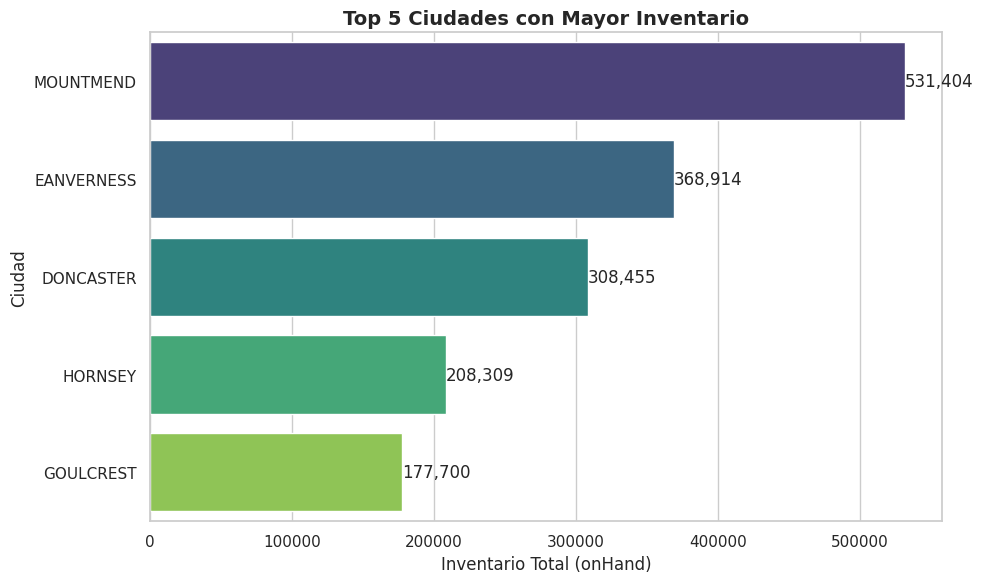

In [ ]:
# Agrupar por ciudad y sumar inventario
df_city_inventory = df.groupby('City', as_index=False)['onHand'].sum()

# Ordenar de mayor a menor inventario
df_city_inventory_sorted = df_city_inventory.sort_values(by='onHand', ascending=False)

# Tomar el Top 5
top5_city_inventory = df_city_inventory_sorted.head(5)
print("🏙️ Top 5 ciudades con mayor inventario:")
print(top5_city_inventory)

# Graficar Top 5 ciudades
plt.figure(figsize=(10,6))
sns.barplot(x='onHand', y='City', data=top5_city_inventory, palette="viridis")
plt.title("Top 5 Ciudades con Mayor Inventario", fontsize=14, weight='bold')
plt.xlabel("Inventario Total (onHand)")
plt.ylabel("Ciudad")

# Agregar etiquetas con valores
for index, value in enumerate(top5_city_inventory['onHand']):
    plt.text(value + 5, index, f"{value:,}", va='center')

plt.tight_layout()
plt.show()

🏙️ Top 5 ciudades con mayor inventario (con valor total):
          City  onHand  InventoryValue
46   MOUNTMEND  531404      9707512.49
23  EANVERNESS  368914      6785681.25
21   DONCASTER  308455      6230607.99
35     HORNSEY  208309      3201915.92
28   GOULCREST  177700      3162740.85


/tmp/ipython-input-3656775592.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='onHand', data=top5_city, palette="viridis", ax=ax1)


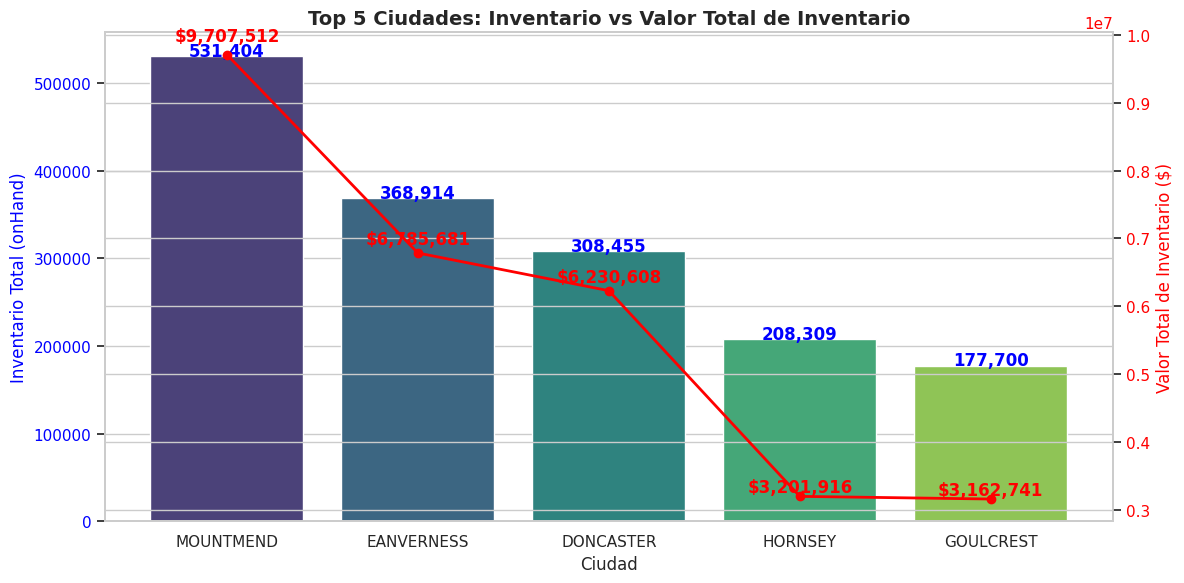

In [ ]:
# Calcular el valor total de inventario
df['InventoryValue'] = df['Price'] * df['onHand']

# Agrupar por ciudad: sumar inventario y valor
df_city = df.groupby('City', as_index=False).agg({
    'onHand': 'sum',
    'InventoryValue': 'sum'
})

# Ordenar por inventario y tomar las 5 ciudades principales
top5_city = df_city.sort_values(by='onHand', ascending=False).head(5)
print("🏙️ Top 5 ciudades con mayor inventario (con valor total):")
print(top5_city)

# Crear gráfico combinado
fig, ax1 = plt.subplots(figsize=(12,6))

# Barras: inventario
sns.barplot(x='City', y='onHand', data=top5_city, palette="viridis", ax=ax1)
ax1.set_xlabel("Ciudad")
ax1.set_ylabel("Inventario Total (onHand)", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
plt.title("Top 5 Ciudades: Inventario vs Valor Total de Inventario", fontsize=14, weight='bold')

# Etiquetas en las barras de inventario
for i, value in enumerate(top5_city['onHand']):
    ax1.text(i, value + 50, f"{value:,}", ha='center', color="blue", fontweight='bold')

# Línea: valor total de inventario
ax2 = ax1.twinx()
ax2.plot(top5_city['City'], top5_city['InventoryValue'], color="red", marker="o", linewidth=2, label="Valor Total ($)")
ax2.set_ylabel("Valor Total de Inventario ($)", color="red")
ax2.tick_params(axis='y', labelcolor="red")

# Etiquetas en los puntos de valor
for i, value in enumerate(top5_city['InventoryValue']):
    ax2.text(i, value + (value * 0.02), f"${value:,.0f}", ha='center', color="red", fontweight='bold')

plt.tight_layout()
plt.show()

🏙️ Top 10 ciudades con mayor inventario (con valor total):
            City  onHand  InventoryValue
46     MOUNTMEND  531404      9707512.49
23    EANVERNESS  368914      6785681.25
21     DONCASTER  308455      6230607.99
35       HORNSEY  208309      3201915.92
28     GOULCREST  177700      3162740.85
49    PAENTMARWY  166015      2803645.13
54     PITMERDEN  145829      3074616.75
41      LARNWICK  138226      2326504.19
22     DRY GULCH  125584      2234836.35
32  HARDERSFIELD  120936      1755719.39


/tmp/ipython-input-3716776650.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='onHand', data=top10_city, palette="viridis", ax=ax1)


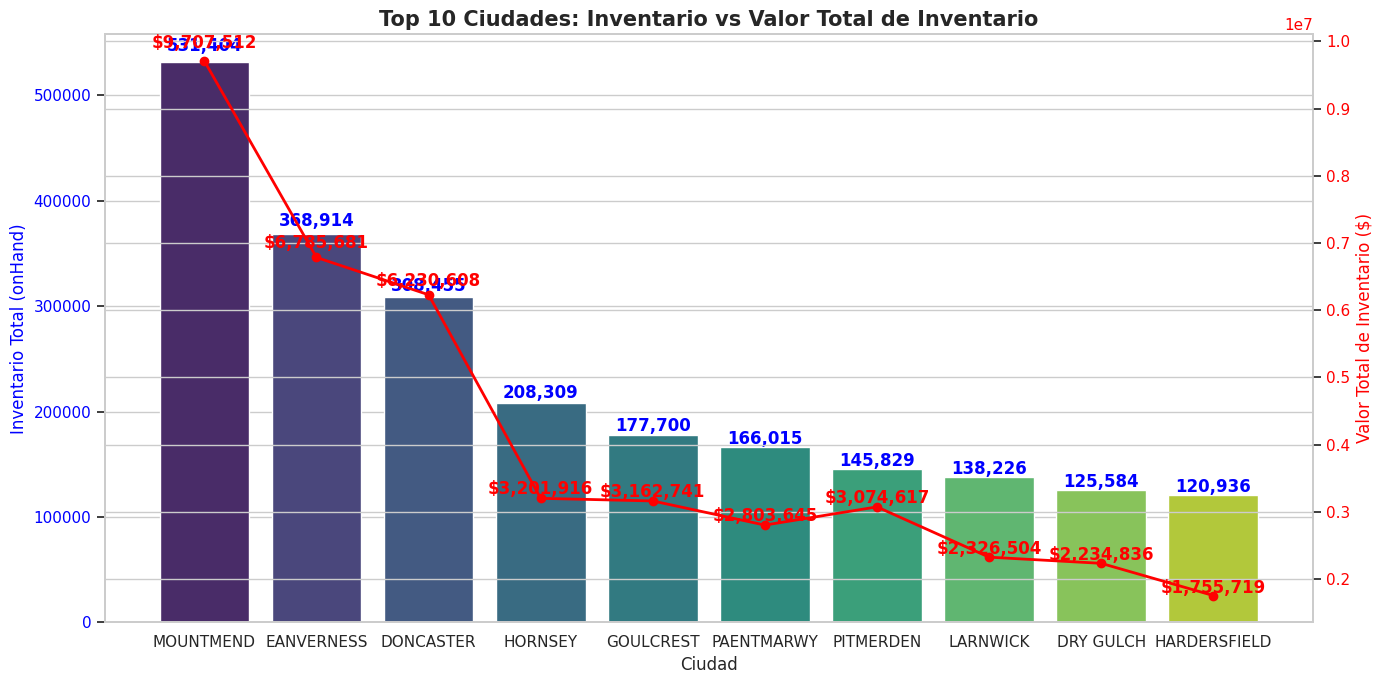

/tmp/ipython-input-3716776650.py:58: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


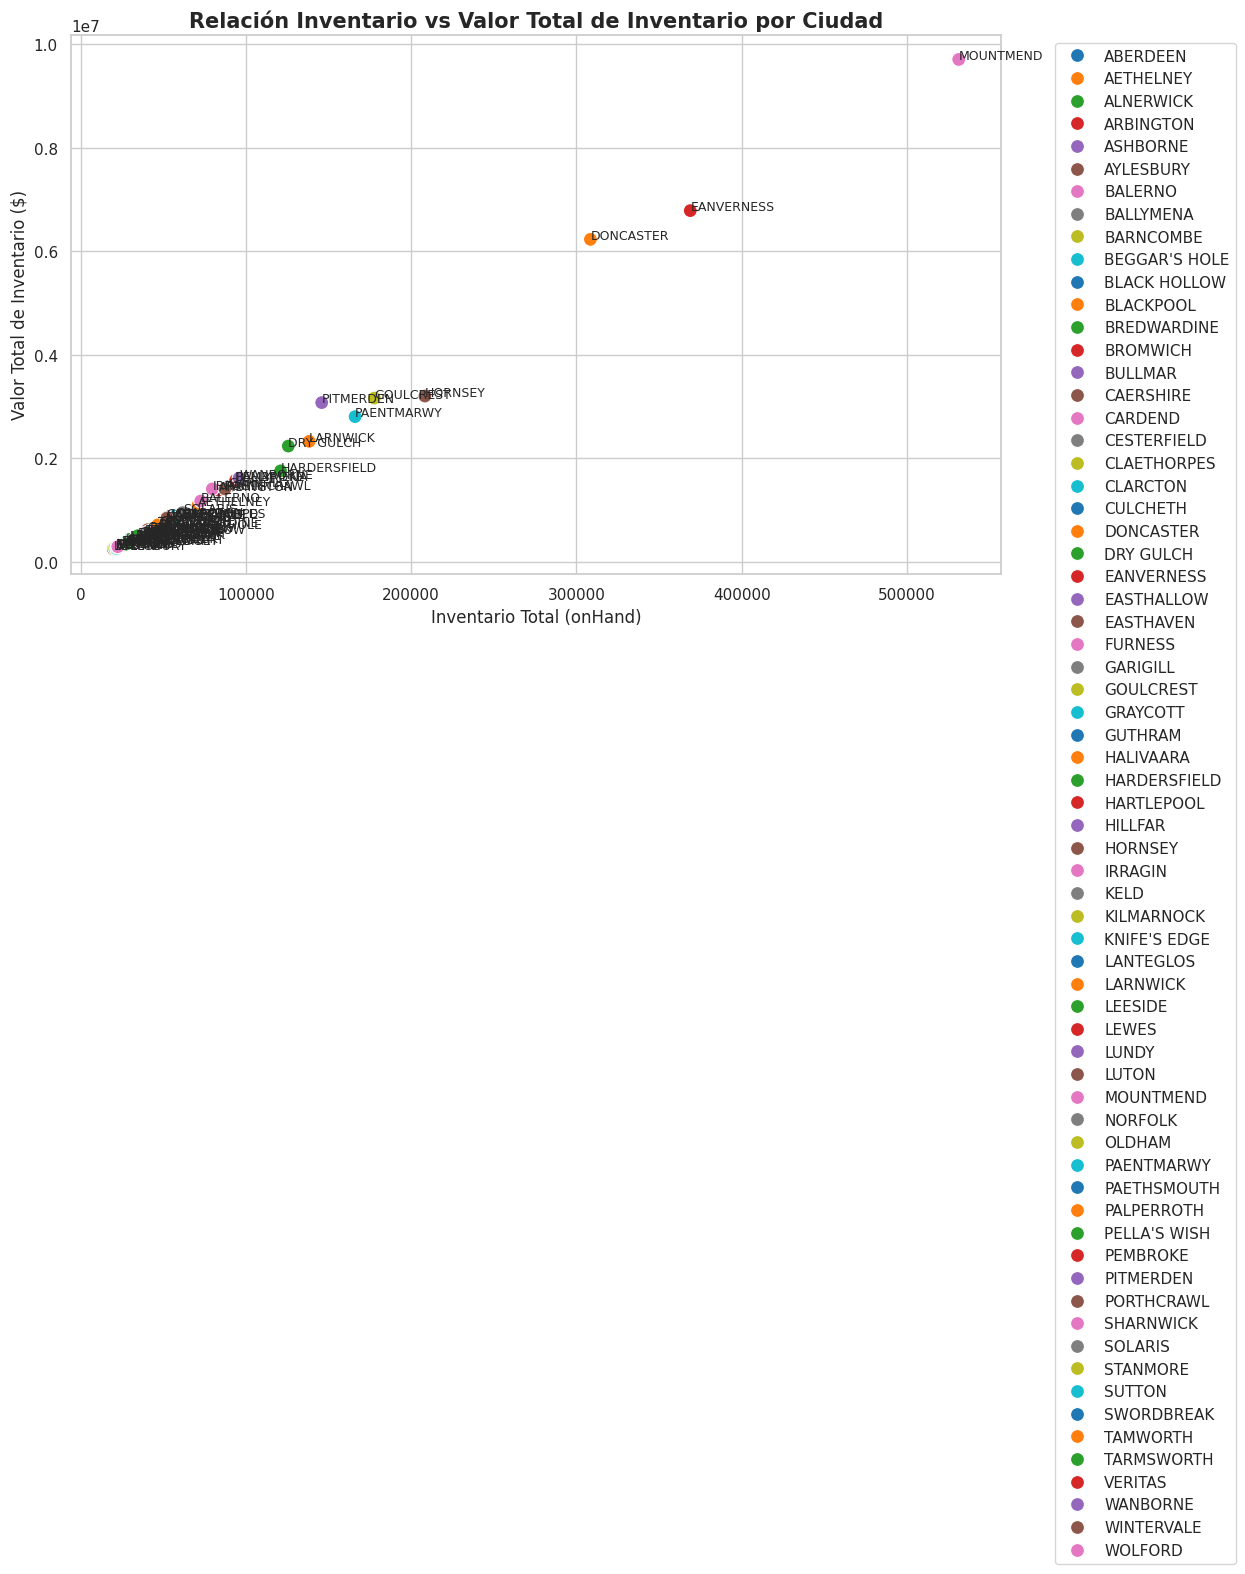

In [ ]:
# Calcular el valor total de inventario
df['InventoryValue'] = df['Price'] * df['onHand']

# Agrupar por ciudad: sumar inventario y valor
df_city = df.groupby('City', as_index=False).agg({
    'onHand': 'sum',
    'InventoryValue': 'sum'
})

# ==========================
# 1️⃣ Top 10 Ciudades: Inventario y Valor
# ==========================
top10_city = df_city.sort_values(by='onHand', ascending=False).head(10)
print("🏙️ Top 10 ciudades con mayor inventario (con valor total):")
print(top10_city)

# Gráfico combinado
fig, ax1 = plt.subplots(figsize=(14,7))

# Barras: inventario
sns.barplot(x='City', y='onHand', data=top10_city, palette="viridis", ax=ax1)
ax1.set_xlabel("Ciudad")
ax1.set_ylabel("Inventario Total (onHand)", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
plt.title("Top 10 Ciudades: Inventario vs Valor Total de Inventario", fontsize=15, weight='bold')

# Etiquetas en barras
for i, value in enumerate(top10_city['onHand']):
    ax1.text(i, value + (value * 0.02), f"{value:,}", ha='center', color="blue", fontweight='bold')

# Línea: valor total
ax2 = ax1.twinx()
ax2.plot(top10_city['City'], top10_city['InventoryValue'], color="red", marker="o", linewidth=2, label="Valor Total ($)")
ax2.set_ylabel("Valor Total de Inventario ($)", color="red")
ax2.tick_params(axis='y', labelcolor="red")

# Etiquetas en línea de valor
for i, value in enumerate(top10_city['InventoryValue']):
    ax2.text(i, value + (value * 0.02), f"${value:,.0f}", ha='center', color="red", fontweight='bold')

plt.tight_layout()
plt.show()

# ==========================
# 2️⃣ Gráfico de dispersión: Inventario vs Valor
# ==========================
plt.figure(figsize=(12,7))
sns.scatterplot(x='onHand', y='InventoryValue', data=df_city, hue='City', s=100, palette="tab10")

# Etiquetas de ciudad en cada punto
for i in range(df_city.shape[0]):
    plt.text(df_city['onHand'][i]+50, df_city['InventoryValue'][i], df_city['City'][i], fontsize=9)

plt.title("Relación Inventario vs Valor Total de Inventario por Ciudad", fontsize=15, weight='bold')
plt.xlabel("Inventario Total (onHand)")
plt.ylabel("Valor Total de Inventario ($)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Configuración visual
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (14,7)

# Calcular el valor total de inventario
df['InventoryValue'] = df['Price'] * df['onHand']

# Agrupar por ciudad
df_city = df.groupby('City', as_index=False).agg({
    'onHand': 'sum',
    'InventoryValue': 'sum'
})

# ==========================
# Función para actualizar el dashboard
# ==========================
def dashboard_top_cities(top_n):
    clear_output(wait=True)

    # Ordenar por inventario y tomar el Top N
    top_cities = df_city.sort_values(by='onHand', ascending=False).head(top_n)

    # Mostrar tabla
    print(f"🏙️ Top {top_n} ciudades con mayor inventario (con valor total):")
    display(top_cities)

    # ---- Gráfico combinado (Barras + Línea) ----
    fig, ax1 = plt.subplots(figsize=(14,7))
    sns.barplot(x='City', y='onHand', data=top_cities, palette="viridis", ax=ax1)
    ax1.set_xlabel("Ciudad")
    ax1.set_ylabel("Inventario Total (onHand)", color="blue")
    ax1.tick_params(axis='y', labelcolor="blue")
    plt.title(f"Top {top_n} Ciudades: Inventario vs Valor Total de Inventario", fontsize=15, weight='bold')

    # Etiquetas en las barras
    for i, value in enumerate(top_cities['onHand']):
        ax1.text(i, value + (value * 0.02), f"{value:,}", ha='center', color="blue", fontweight='bold')

    # Línea de valor total
    ax2 = ax1.twinx()
    ax2.plot(top_cities['City'], top_cities['InventoryValue'], color="red", marker="o", linewidth=2, label="Valor Total ($)")
    ax2.set_ylabel("Valor Total de Inventario ($)", color="red")
    ax2.tick_params(axis='y', labelcolor="red")

    for i, value in enumerate(top_cities['InventoryValue']):
        ax2.text(i, value + (value * 0.02), f"${value:,.0f}", ha='center', color="red", fontweight='bold')

    plt.tight_layout()
    plt.show()

    # ---- Gráfico de dispersión ----
    plt.figure(figsize=(12,7))
    sns.scatterplot(x='onHand', y='InventoryValue', data=df_city, hue='City', s=100, palette="tab10")

    # Etiquetas de ciudad en los puntos
    for i in range(df_city.shape[0]):
        plt.text(df_city['onHand'][i]+50, df_city['InventoryValue'][i], df_city['City'][i], fontsize=9)

    plt.title("Relación Inventario vs Valor Total de Inventario por Ciudad", fontsize=15, weight='bold')
    plt.xlabel("Inventario Total (onHand)")
    plt.ylabel("Valor Total de Inventario ($)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# ==========================
# Widget interactivo
# ==========================
slider_top_n = widgets.IntSlider(value=5, min=3, max=20, step=1, description='Top N Ciudades:')
widgets.interact(dashboard_top_cities, top_n=slider_top_n)


interactive(children=(IntSlider(value=5, description='Top N Ciudades:', max=20, min=3), Output()), _dom_classe…

<function __main__.dashboard_top_cities(top_n)>

In [13]:
# Configuración visual
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (14,7)

# Calcular el valor total de inventario
df['InventoryValue'] = df['Price'] * df['onHand']

# Agrupar por ciudad
df_city = df.groupby('City', as_index=False).agg({
    'onHand': 'sum',
    'InventoryValue': 'sum'
})

# ==========================
# Función: Top N Ciudades
# ==========================
def dashboard_top_cities(top_n):
    clear_output(wait=True)

    top_cities = df_city.sort_values(by='onHand', ascending=False).head(top_n)
    print(f"🏙️ Top {top_n} ciudades con mayor inventario (con valor total):")
    display(top_cities)

    # Gráfico combinado (Barras + Línea)
    fig, ax1 = plt.subplots(figsize=(14,7))
    sns.barplot(x='City', y='onHand', data=top_cities, palette="viridis", ax=ax1)
    ax1.set_xlabel("Ciudad")
    ax1.set_ylabel("Inventario Total (onHand)", color="blue")
    ax1.tick_params(axis='y', labelcolor="blue")
    plt.title(f"Top {top_n} Ciudades: Inventario vs Valor Total de Inventario", fontsize=15, weight='bold')

    for i, value in enumerate(top_cities['onHand']):
        ax1.text(i, value + (value * 0.02), f"{value:,}", ha='center', color="blue", fontweight='bold')

    ax2 = ax1.twinx()
    ax2.plot(top_cities['City'], top_cities['InventoryValue'], color="red", marker="o", linewidth=2, label="Valor Total ($)")
    ax2.set_ylabel("Valor Total de Inventario ($)", color="red")
    ax2.tick_params(axis='y', labelcolor="red")

    for i, value in enumerate(top_cities['InventoryValue']):
        ax2.text(i, value + (value * 0.02), f"${value:,.0f}", ha='center', color="red", fontweight='bold')

    plt.tight_layout()
    plt.show()

    # Gráfico de dispersión
    plt.figure(figsize=(12,7))
    sns.scatterplot(x='onHand', y='InventoryValue', data=df_city, hue='City', s=100, palette="tab10")

    for i in range(df_city.shape[0]):
        plt.text(df_city['onHand'][i]+50, df_city['InventoryValue'][i], df_city['City'][i], fontsize=9)

    plt.title("Relación Inventario vs Valor Total de Inventario por Ciudad", fontsize=15, weight='bold')
    plt.xlabel("Inventario Total (onHand)")
    plt.ylabel("Valor Total de Inventario ($)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# ==========================
# Función: Análisis por Ciudad
# ==========================
def dashboard_ciudad(ciudad):
    clear_output(wait=True)

    df_city_sel = df[df['City'] == ciudad]
    total_inv = df_city_sel['onHand'].sum()
    valor_inv = df_city_sel['InventoryValue'].sum()
    precio_prom = df_city_sel['Price'].mean()
    marcas_unicas = df_city_sel['Brand'].nunique()
    productos_unicos = df_city_sel['Description'].nunique()

    print(f"📍 Dashboard - Ciudad: {ciudad}")
    print(f"- Total inventario: {total_inv:,}")
    print(f"- Valor total inventario: ${valor_inv:,.2f}")
    print(f"- Precio promedio: ${precio_prom:,.2f}")
    print(f"- Marcas únicas: {marcas_unicas}")
    print(f"- Productos únicos: {productos_unicos}")

    # Top productos
    df_top_prod = df_city_sel.groupby('Description', as_index=False)['onHand'].sum().sort_values(by='onHand', ascending=False).head(10)
    plt.figure()
    sns.barplot(x='onHand', y='Description', data=df_top_prod, palette='coolwarm')
    plt.title(f"Top 10 Productos con Mayor Inventario en {ciudad}")
    plt.xlabel("Inventario (onHand)")
    plt.ylabel("Producto")
    plt.show()

    # Top marcas
    df_top_brand = df_city_sel.groupby('Brand', as_index=False)['InventoryValue'].sum().sort_values(by='InventoryValue', ascending=False).head(10)
    plt.figure()
    sns.barplot(x='InventoryValue', y='Brand', data=df_top_brand, palette='magma')
    plt.title(f"Top 10 Marcas por Valor en {ciudad}")
    plt.xlabel("Valor Inventario ($)")
    plt.ylabel("Marca")
    plt.show()

    # Distribución precios
    plt.figure()
    sns.histplot(df_city_sel['Price'], bins=20, kde=True, color='blue')
    plt.title(f"Distribución de Precios en {ciudad}")
    plt.xlabel("Precio")
    plt.ylabel("Frecuencia")
    plt.show()

# ==========================
# Widgets interactivos
# ==========================
slider_top_n = widgets.IntSlider(value=5, min=3, max=20, step=1, description='Top N Ciudades:')
dropdown_ciudad = widgets.Dropdown(options=sorted(df['City'].dropna().unique()), description="Ciudad:")

print("🔝 Selecciona Top N ciudades:")
widgets.interact(dashboard_top_cities, top_n=slider_top_n)

print("\n🏙️ Selecciona una ciudad para análisis detallado:")
widgets.interact(dashboard_ciudad, ciudad=dropdown_ciudad)

🔝 Selecciona Top N ciudades:


interactive(children=(IntSlider(value=5, description='Top N Ciudades:', max=20, min=3), Output()), _dom_classe…


🏙️ Selecciona una ciudad para análisis detallado:


interactive(children=(Dropdown(description='Ciudad:', options=('ABERDEEN', 'AETHELNEY', 'ALNERWICK', 'ARBINGTO…

<function __main__.dashboard_ciudad(ciudad)>

In [14]:
# Asegurarse de que las columnas necesarias estén en el tipo correcto
df["onHand"] = pd.to_numeric(df["onHand"], errors="coerce")
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

# Calcular el valor total del inventario por producto
df["ValorTotal"] = df["onHand"] * df["Price"]

# Seleccionar las columnas relevantes y ordenar
top5 = df[["Description", "City", "onHand", "Price", "ValorTotal"]].sort_values(by="ValorTotal", ascending=False).head(5)

# Mostrar la tabla
print(top5)

#Top 5 productos con mayor valor total de inventario

                       Description       City  onHand  Price  ValorTotal
123623     Jack Daniels No 7 Black  MOUNTMEND    1246  34.99    43597.54
182493  Johnnie Walker Black Label  MOUNTMEND     650  59.99    38993.50
124408             Ketel One Vodka  MOUNTMEND    1176  29.99    35268.24
124350       Tito's Handmade Vodka  MOUNTMEND    1164  28.99    33744.36
125473            Absolut 80 Proof  MOUNTMEND    1273  23.49    29902.77


Número de productos con inventario cero: 7230

Top 5 ciudades con mayor precio promedio:
City
PITMERDEN     40.338336
DONCASTER     37.473854
EANVERNESS    35.953527
MOUNTMEND     29.257265
GOULCREST     27.431263
Name: Price, dtype: float64

Top 10 productos más caros:
                         Description        City     Price
80372        Glen Grant 50 Yr Scotch   PITMERDEN  13999.90
174284     Patron En Lalique Tequila  EANVERNESS   7499.99
169361     Patron En Lalique Tequila  EANVERNESS   7499.99
80904      Patron En Lalique Tequila   PITMERDEN   7499.99
80236             Glenmorangie Pride   PITMERDEN   5799.99
123945            Glenmorangie Pride   MOUNTMEND   5799.99
168705            Glenmorangie Pride  EANVERNESS   5799.99
81073   Appleton Estate 50Yr Old Rum   PITMERDEN   4999.99
169529  Appleton Estate 50Yr Old Rum  EANVERNESS   4999.99
174451  Appleton Estate 50Yr Old Rum  EANVERNESS   4999.99

Top 5 tamaños con mayor cantidad total en inventario:
Size
750mL    2859983
50m

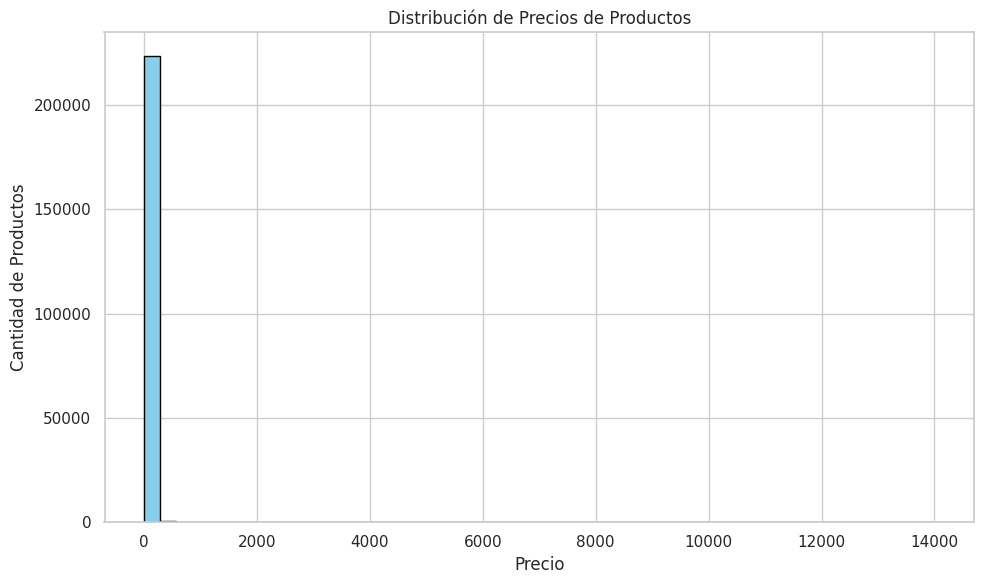

In [15]:
# Convertir columnas a tipo numérico
df["onHand"] = pd.to_numeric(df["onHand"], errors="coerce")
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

# 1. Productos con inventario cero
productos_sin_inventario = df[df["onHand"] == 0]
print("Número de productos con inventario cero:", len(productos_sin_inventario))

# 2. Promedio de precio por ciudad (Top 5)
precio_promedio_ciudad = df.groupby("City")["Price"].mean().sort_values(ascending=False).head(5)
print("\nTop 5 ciudades con mayor precio promedio:")
print(precio_promedio_ciudad)

# 3. Top 10 productos más caros
productos_mas_caros = df[["Description", "City", "Price"]].sort_values(by="Price", ascending=False).dropna().head(10)
print("\nTop 10 productos más caros:")
print(productos_mas_caros)

# 4. Cantidad total de productos por tamaño (Top 5)
cantidad_por_tamano = df.groupby("Size")["onHand"].sum().sort_values(ascending=False).head(5)
print("\nTop 5 tamaños con mayor cantidad total en inventario:")
print(cantidad_por_tamano)

# 5. Histograma de distribución de precios
plt.figure(figsize=(10, 6))
df["Price"].dropna().hist(bins=50, color='skyblue', edgecolor='black')
plt.title("Distribución de Precios de Productos")
plt.xlabel("Precio")
plt.ylabel("Cantidad de Productos")
plt.grid(True)
plt.tight_layout()
plt.savefig("histograma_precios.png")
plt.show()


In [16]:
# Asegurarse de que la columna 'onHand' sea numérica
df["onHand"] = pd.to_numeric(df["onHand"], errors="coerce")

# Filtrar productos con inventario cero
inventario_cero = df[df["onHand"] == 0][["Description", "City", "onHand"]]

# Mostrar la tabla resultante
print("Productos con inventario cero y sus ciudades:")
print(inventario_cero)


Productos con inventario cero y sus ciudades:
                         Description          City  onHand
31      Baileys Irish Cream w/2 Mugs  HARDERSFIELD       0
113              Baileys 50mL 4 Pack  HARDERSFIELD       0
114     Crown Royal VAP Glass+Coastr  HARDERSFIELD       0
119     Jack Daniels Bruins Glass Pk  HARDERSFIELD       0
131          Jack Daniels Equity VAP  HARDERSFIELD       0
...                              ...           ...     ...
224057      Penfolds T Hyland Shiraz      PEMBROKE       0
224090   Dom Tempier Bandol Rose Pro      PEMBROKE       0
224136  Sterling Vintners Cltn Syrah      PEMBROKE       0
224289    Stoneleigh Pnt Nr Marlboro      PEMBROKE       0
224369  Provenance To Kalon Cab Svgn      PEMBROKE       0

[7230 rows x 3 columns]


In [17]:
# Convertir la columna 'Price' a tipo numérico
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

# Calcular el precio promedio por ciudad
precio_promedio_ciudad = df.groupby("City")["Price"].mean().sort_values(ascending=False).head(5)

# Mostrar el resultado
print("Top 5 ciudades con mayor precio promedio:")
print(precio_promedio_ciudad)


Top 5 ciudades con mayor precio promedio:
City
PITMERDEN     40.338336
DONCASTER     37.473854
EANVERNESS    35.953527
MOUNTMEND     29.257265
GOULCREST     27.431263
Name: Price, dtype: float64


Tendencias por tamaño de producto (Top 10):
            total_inventario  precio_promedio  conteo_productos
Size                                                           
750mL                2859983        26.243699            158227
50mL                  789013         1.911015             10664
1.75L                 676428        25.369641             22427
1.5L                  246257        13.463930             12826
375mL                 143182        16.566716              8319
Liter                  67265        28.861160              3783
3L                     24137        17.658870              2647
5L                     16109        16.005541              1673
187mL                   8917         5.656489               376
187mL 4 Pk              8349         7.438684               608


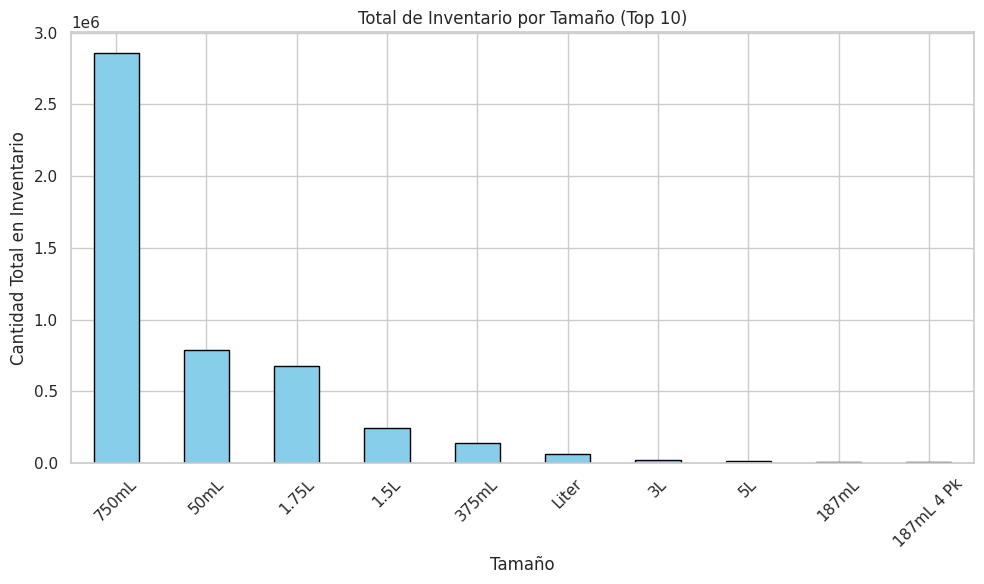

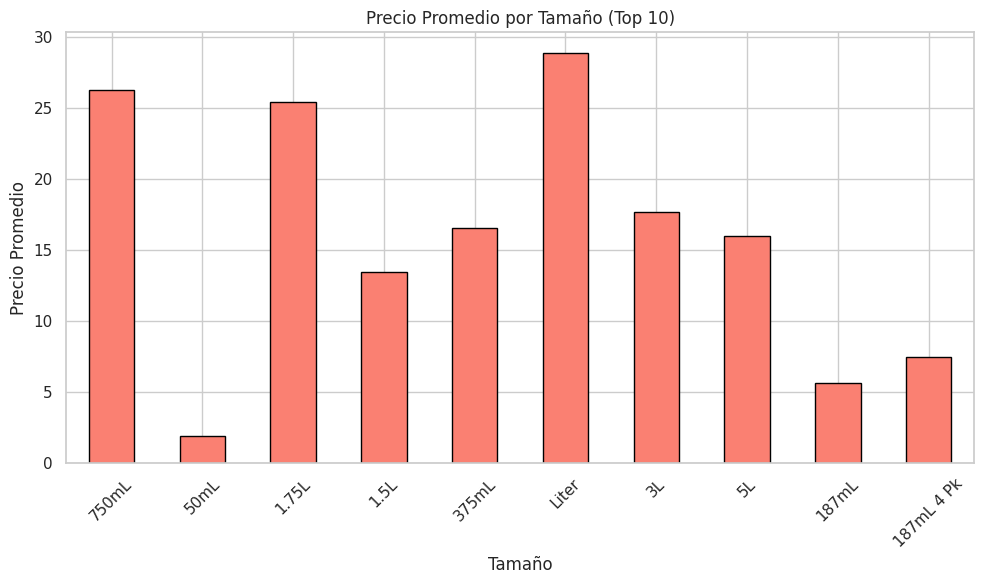

In [18]:
# Asegurar que las columnas numéricas estén en el tipo correcto
df["onHand"] = pd.to_numeric(df["onHand"], errors="coerce")
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

# Agrupar por tamaño y calcular estadísticas
tamaño_stats = df.groupby("Size").agg(
    total_inventario=("onHand", "sum"),
    precio_promedio=("Price", "mean"),
    conteo_productos=("Description", "count")
).sort_values(by="total_inventario", ascending=False)

# Mostrar las 10 principales tendencias por tamaño
print("Tendencias por tamaño de producto (Top 10):")
print(tamaño_stats.head(10))

# Gráfico de barras: Total de inventario por tamaño (Top 10)
plt.figure(figsize=(10, 6))
tamaño_stats["total_inventario"].head(10).plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Total de Inventario por Tamaño (Top 10)")
plt.xlabel("Tamaño")
plt.ylabel("Cantidad Total en Inventario")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("inventario_por_tamaño.png")
plt.show()

# Gráfico de barras: Precio promedio por tamaño (Top 10)
plt.figure(figsize=(10, 6))
tamaño_stats["precio_promedio"].head(10).plot(kind="bar", color="salmon", edgecolor="black")
plt.title("Precio Promedio por Tamaño (Top 10)")
plt.xlabel("Tamaño")
plt.ylabel("Precio Promedio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("precio_promedio_por_tamaño.png")
plt.show()


Resumen por tipo de producto:
              total_inventario  precio_promedio  conteo_productos
TipoProducto                                                     
Otro                   3532240        23.012342            168590
Vodka                   494678        16.675101             14055
Rum                     264841        17.743270              9465
Tequila                 124010        34.930831              7247
Liqueur                 109669        18.650068              5264
Whiskey                 109101        31.181989              4444
Gin                      79785        26.155655              4417
Bourbon                  56018        32.945627              3279
Brandy                   43852        13.072334              2202
Cognac                   27456        71.819268              1420
Scotch                   18442        69.666484              2028
Vermouth                 18249         8.920940              1351
Sake                      5675        10.60117

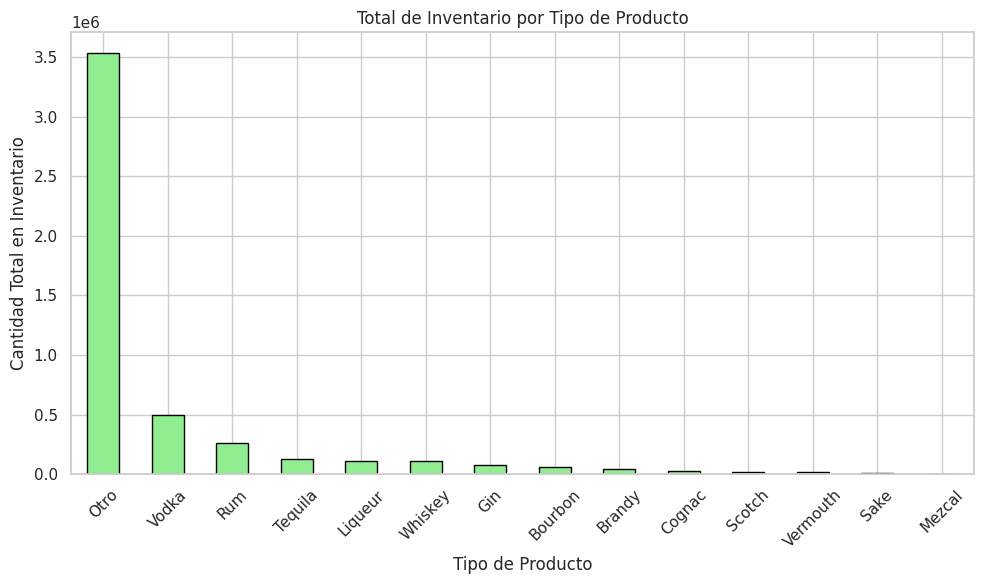

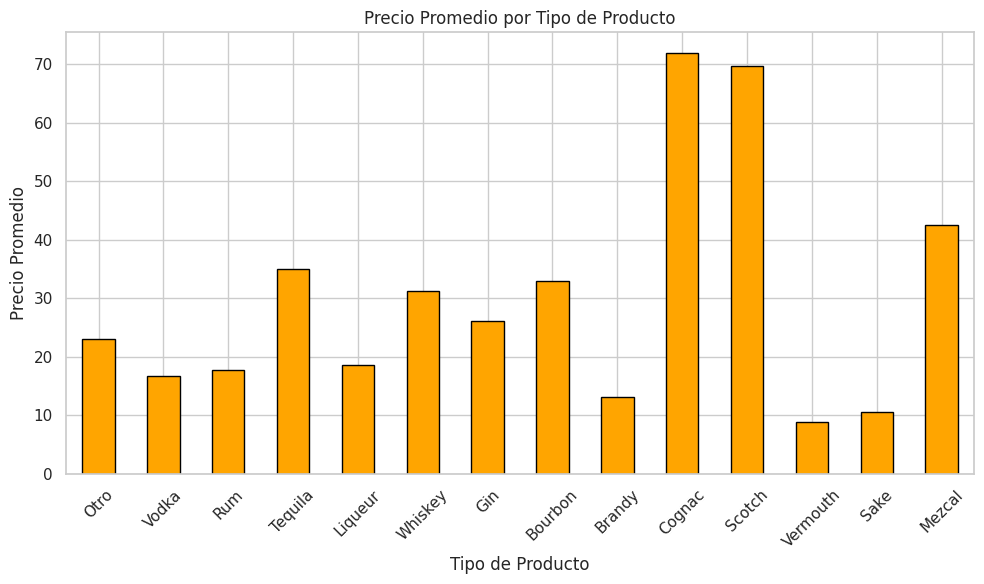

In [19]:
# Asegurar que las columnas numéricas estén en el tipo correcto
df["onHand"] = pd.to_numeric(df["onHand"], errors="coerce")
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

# Definir tipos de productos por palabras clave
tipos = {
    "Vodka": "Vodka",
    "Tequila": "Tequila",
    "Whiskey": "Whiskey",
    "Whisky": "Whiskey",
    "Scotch": "Scotch",
    "Rum": "Rum",
    "Gin": "Gin",
    "Brandy": "Brandy",
    "Liqueur": "Liqueur",
    "Cognac": "Cognac",
    "Sake": "Sake",
    "Mezcal": "Mezcal",
    "Bourbon": "Bourbon",
    "Vermouth": "Vermouth"
}

# Clasificar tipo de producto
def clasificar_tipo(desc):
    for palabra, tipo in tipos.items():
        if pd.notnull(desc) and palabra.lower() in desc.lower():
            return tipo
    return "Otro"

df["TipoProducto"] = df["Description"].apply(clasificar_tipo)

# Agrupar por tipo de producto
resumen_tipo = df.groupby("TipoProducto").agg(
    total_inventario=("onHand", "sum"),
    precio_promedio=("Price", "mean"),
    conteo_productos=("Description", "count")
).sort_values(by="total_inventario", ascending=False)

# Mostrar resumen
print("Resumen por tipo de producto:")
print(resumen_tipo)

# Visualización: Total de inventario por tipo
plt.figure(figsize=(10, 6))
resumen_tipo["total_inventario"].plot(kind="bar", color="lightgreen", edgecolor="black")
plt.title("Total de Inventario por Tipo de Producto")
plt.xlabel("Tipo de Producto")
plt.ylabel("Cantidad Total en Inventario")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("inventario_por_tipo.png")
plt.show()

# Visualización: Precio promedio por tipo
plt.figure(figsize=(10, 6))
resumen_tipo["precio_promedio"].plot(kind="bar", color="orange", edgecolor="black")
plt.title("Precio Promedio por Tipo de Producto")
plt.xlabel("Tipo de Producto")
plt.ylabel("Precio Promedio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("precio_promedio_por_tipo.png")
plt.show()


Resumen por tienda:
       total_inventario  precio_promedio  conteo_productos
Store                                                     
50               260717        34.567383              7111
74               166015        23.367080              5222
73               164589        36.324253              5445
67               163765        38.464240              5141
69               150848        30.807874              5724
34               145829        40.338336              6442
66               144579        42.757692              4887
76               143866        38.696428              5120
38               129397        33.161717              4944
55               125584        24.680175              4803


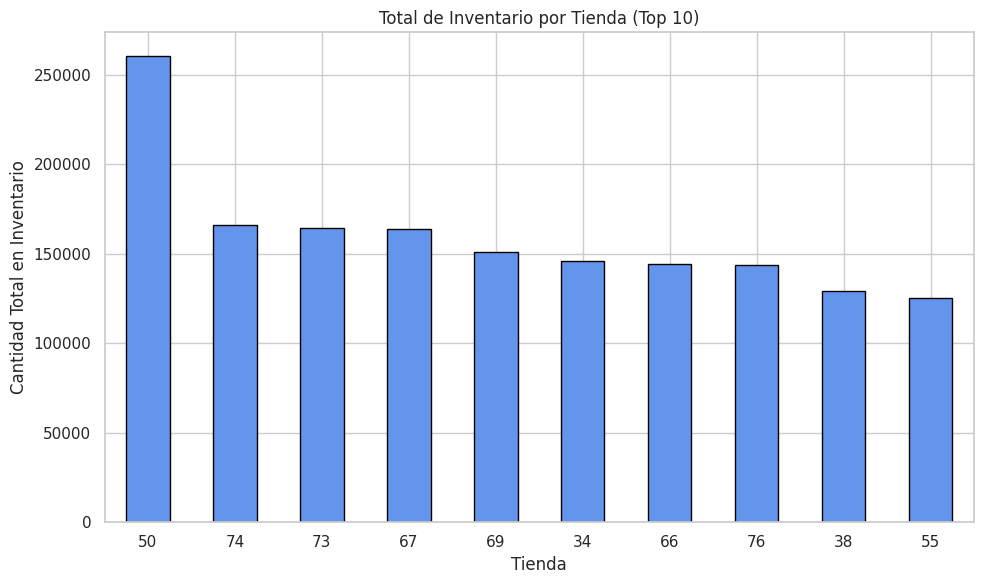

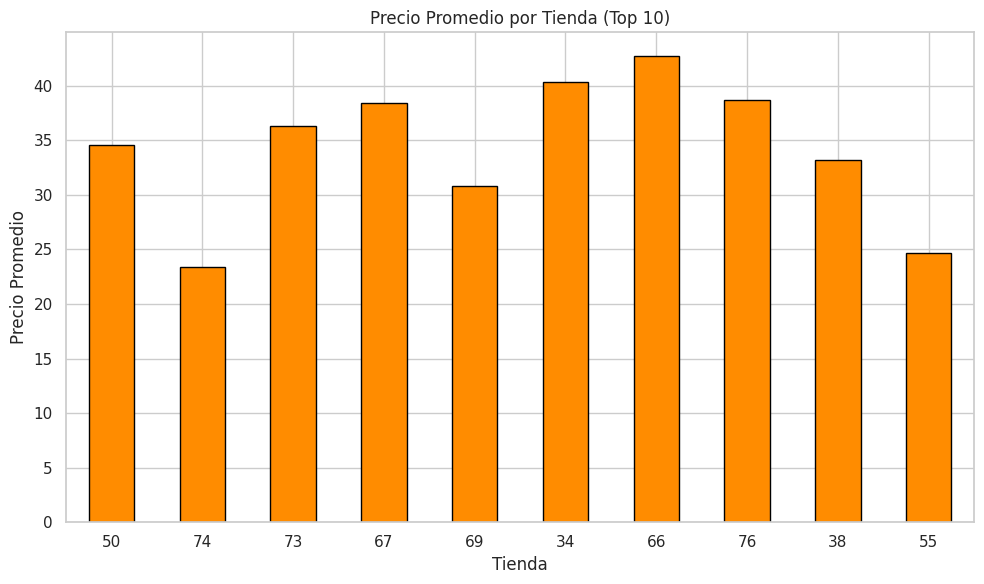


Resumen por marca:
       total_inventario  precio_promedio  conteo_productos
Brand                                                     
3545              16770            29.99                79
4261              16769            20.99                79
8111              16242             0.99                78
8068              15608            23.49                79
1233              15047            34.99                79
3102              14208            16.99                78
5111              13804             0.99                79
1376              13180            20.99                79
6570              13016             9.99                80
1892              12764             0.99                78


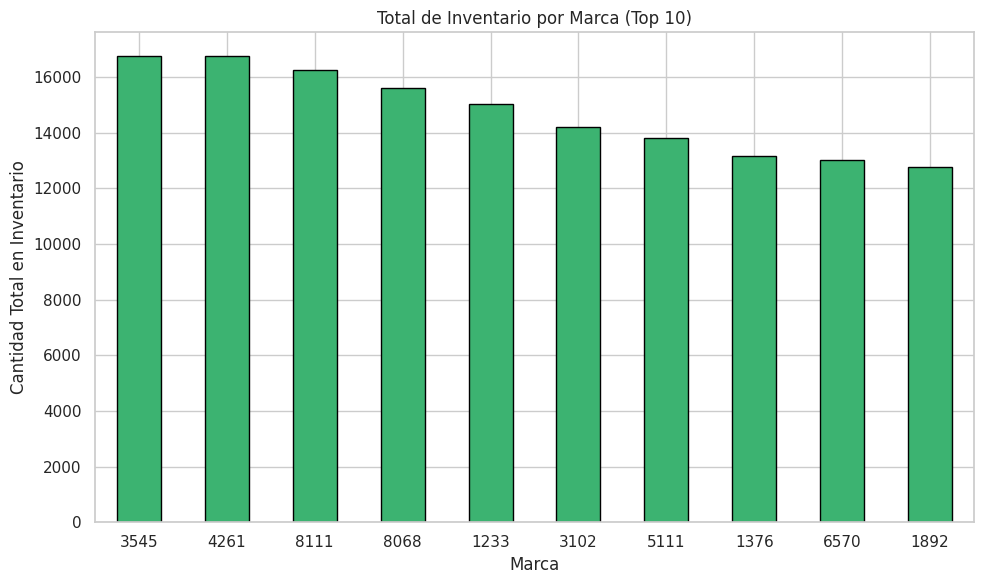

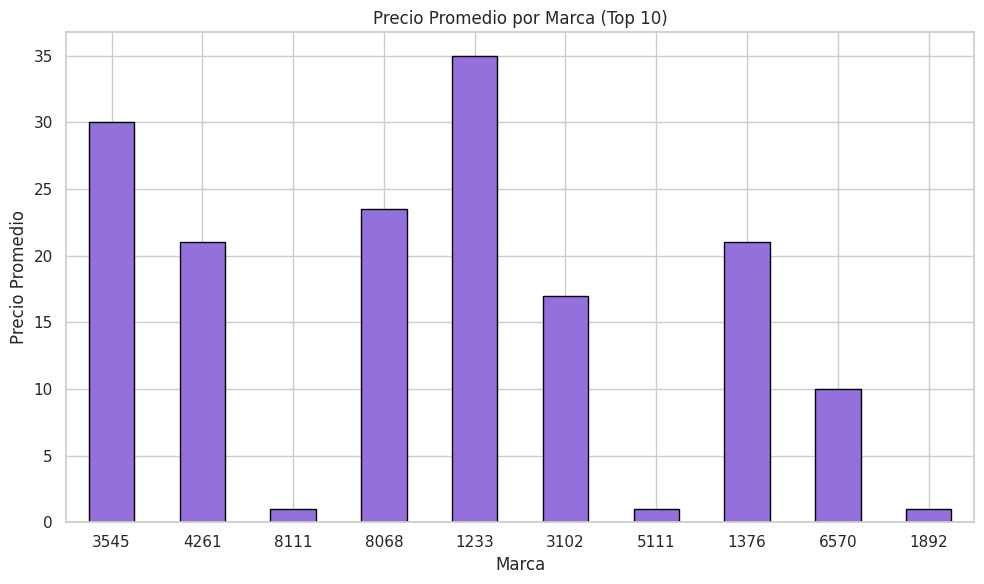

In [20]:
# Asegurar que las columnas numéricas estén en el tipo correcto
df["onHand"] = pd.to_numeric(df["onHand"], errors="coerce")
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

# --- Tendencias por tienda ---
resumen_tienda = df.groupby("Store").agg(
    total_inventario=("onHand", "sum"),
    precio_promedio=("Price", "mean"),
    conteo_productos=("Description", "count")
).sort_values(by="total_inventario", ascending=False)

print("Resumen por tienda:")
print(resumen_tienda.head(10))

# Gráfico: Total de inventario por tienda
plt.figure(figsize=(10, 6))
resumen_tienda["total_inventario"].head(10).plot(kind="bar", color="cornflowerblue", edgecolor="black")
plt.title("Total de Inventario por Tienda (Top 10)")
plt.xlabel("Tienda")
plt.ylabel("Cantidad Total en Inventario")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("inventario_por_tienda.png")
plt.show()

# Gráfico: Precio promedio por tienda
plt.figure(figsize=(10, 6))
resumen_tienda["precio_promedio"].head(10).plot(kind="bar", color="darkorange", edgecolor="black")
plt.title("Precio Promedio por Tienda (Top 10)")
plt.xlabel("Tienda")
plt.ylabel("Precio Promedio")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("precio_promedio_por_tienda.png")
plt.show()

# --- Tendencias por marca ---
resumen_marca = df.groupby("Brand").agg(
    total_inventario=("onHand", "sum"),
    precio_promedio=("Price", "mean"),
    conteo_productos=("Description", "count")
).sort_values(by="total_inventario", ascending=False)

print("\nResumen por marca:")
print(resumen_marca.head(10))

# Gráfico: Total de inventario por marca
plt.figure(figsize=(10, 6))
resumen_marca["total_inventario"].head(10).plot(kind="bar", color="mediumseagreen", edgecolor="black")
plt.title("Total de Inventario por Marca (Top 10)")
plt.xlabel("Marca")
plt.ylabel("Cantidad Total en Inventario")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("inventario_por_marca.png")
plt.show()

# Gráfico: Precio promedio por marca
plt.figure(figsize=(10, 6))
resumen_marca["precio_promedio"].head(10).plot(kind="bar", color="mediumpurple", edgecolor="black")
plt.title("Precio Promedio por Marca (Top 10)")
plt.xlabel("Marca")
plt.ylabel("Precio Promedio")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("precio_promedio_por_marca.png")
plt.show()


In [21]:
# Asegurar que la columna 'Price' sea numérica
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

# Obtener el precio máximo por marca
precio_maximo_por_marca = df.groupby("Brand")["Price"].max().reset_index()

# Mostrar la tabla resultante
print("Precio máximo por marca:")
print(precio_maximo_por_marca)


Precio máximo por marca:
      Brand   Price
0        58   12.99
1        60   10.99
2        61   13.99
3        62   36.99
4        63   38.99
...     ...     ...
9648  90089  119.99
9649  90090  649.99
9650  90604  119.99
9651  90609   24.99
9652  90631   18.99

[9653 rows x 2 columns]


In [22]:
# Asegurar que las columnas numéricas estén en el tipo correcto
df["onHand"] = pd.to_numeric(df["onHand"], errors="coerce")
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

# Calcular el valor total del inventario por fila
df["ValorInventario"] = df["onHand"] * df["Price"]

# 1. Valor total del inventario por tienda
valor_por_tienda = df.groupby("Store")["ValorInventario"].sum().sort_values(ascending=False)
print("Valor total del inventario por tienda (Top 10):")
print(valor_por_tienda.head(10))

# 2. Valor total del inventario por ciudad
valor_por_ciudad = df.groupby("City")["ValorInventario"].sum().sort_values(ascending=False)
print("\nValor total del inventario por ciudad (Top 10):")
print(valor_por_ciudad.head(10))

# 3. Ranking de marcas con mayor valor en inventario
valor_por_marca = df.groupby("Brand")["ValorInventario"].sum().sort_values(ascending=False)
print("\nRanking de marcas con mayor valor en inventario (Top 10):")
print(valor_por_marca.head(10))


Valor total del inventario por tienda (Top 10):
Store
50    4887260.68
73    3254662.81
67    3076114.82
34    3074616.75
76    2975945.18
69    2968678.82
66    2860504.99
74    2803645.13
38    2463906.85
55    2234836.35
Name: ValorInventario, dtype: float64

Valor total del inventario por ciudad (Top 10):
City
MOUNTMEND       9707512.49
EANVERNESS      6785681.25
DONCASTER       6230607.99
HORNSEY         3201915.92
GOULCREST       3162740.85
PITMERDEN       3074616.75
PAENTMARWY      2803645.13
LARNWICK        2326504.19
DRY GULCH       2234836.35
HARDERSFIELD    1755719.39
Name: ValorInventario, dtype: float64

Ranking de marcas con mayor valor en inventario (Top 10):
Brand
1233    526494.53
3545    502932.30
2753    470861.51
8068    366631.92
3405    355649.32
4261    351981.31
2757    336370.97
2589    300956.78
1376    276648.20
2585    272557.13
Name: ValorInventario, dtype: float64


In [24]:
#Top ciudades con más tiendas)

# Agrupar por ciudad y contar tiendas únicas
ranking_ciudades = df.groupby("City")["Store"].nunique().sort_values(ascending=False).head(10)

# Mostrar el ranking
print("Ranking de ciudades según la cantidad de tiendas:")
print(ranking_ciudades)


Ranking de ciudades según la cantidad de tiendas:
City
MOUNTMEND       4
HORNSEY         4
EANVERNESS      3
DONCASTER       2
LARNWICK        2
HARDERSFIELD    2
GOULCREST       2
ALNERWICK       1
AETHELNEY       1
ABERDEEN        1
Name: Store, dtype: int64


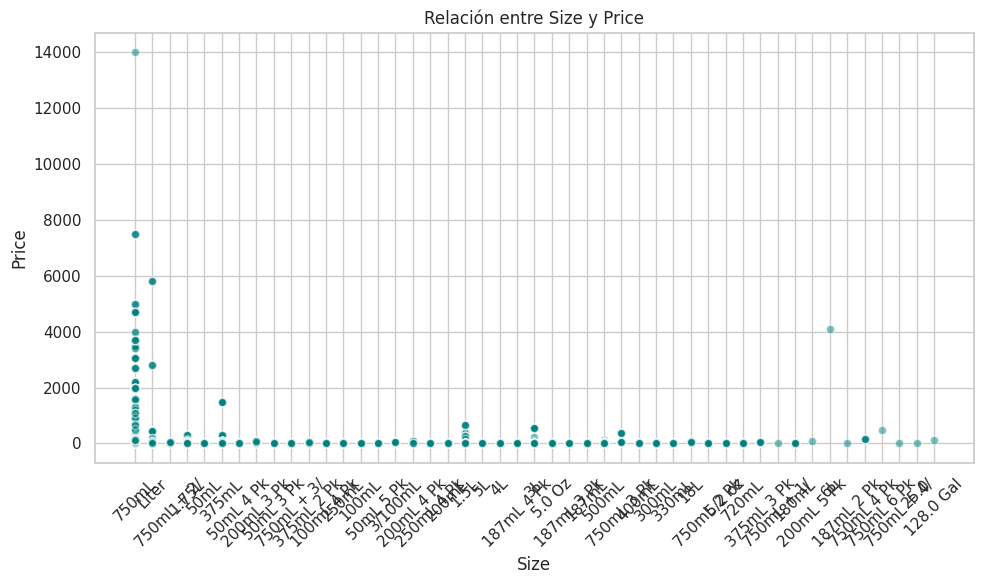

In [25]:
# Convertir la columna Price a numérica
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

# Crear el scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df["Size"], df["Price"], alpha=0.5, color='teal', edgecolors='w')
plt.title("Relación entre Size y Price")
plt.xlabel("Size")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig("scatter_size_vs_price.png")
plt.show()

